In [2]:
from PIL import Image
import cv2
import numpy
from time import time

from preprocess.humanparsing.run_parsing import Parsing
from preprocess.openpose.run_openpose import OpenPose
import matplotlib.pyplot as plt
from masking import get_mask_location


In [3]:
parsing_model = Parsing(-1)
openpose_model = OpenPose(-1)

In [4]:
# human_img = Image.open("/Users/zohaib.munir/Downloads/2024-07-18_05-44-21_7351.png").convert('RGB').resize((768,1024))
human_img = Image.open("hasnain.jpg").convert('RGB')
target_size = human_img.size
human_img = human_img.resize(((768,1024)))
target_size

(1080, 1920)

In [100]:
keypoints = openpose_model(human_img.resize((384,512)))
# keypoints = openpose_model(human_img)

In [101]:
model_parse, _ = parsing_model(human_img.resize((384,512)))
# model_parse, _ = parsing_model(human_img)

100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


In [102]:
mask, mask_gray = get_mask_location('hd', "upper_body", model_parse, keypoints)

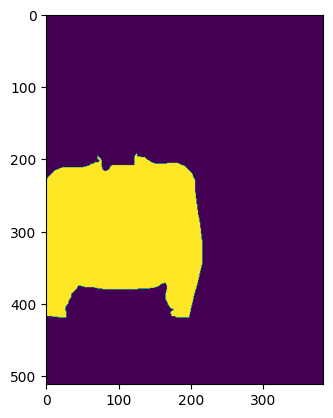

In [103]:
mask_gray = mask_gray.resize((768,1024))
# Show using matplotlib
plt.imshow(mask)
plt.show()

In [104]:
numpy.asarray(mask).shape

(512, 384)

In [105]:
mask.show()

In [108]:
mask.resize(target_size).show()